In [0]:
import torch
import datetime
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from torchvision import datasets, transforms

In [0]:
batch_size    = 32
learning_rate = 0.001
epochs    = 25

In [0]:
def oneHot(a, oneHot_batch_size):
    out = []
    for i in a:
      b = torch.zeros(10)
      b[i] = 1.
      out.append(b)
    out = torch.cat(out)
    out = out.reshape(oneHot_batch_size, 10)
    return out

In [0]:
train_loader = torch.utils.data.DataLoader(datasets.FashionMNIST('data', 
                                                          train=True, 
                                                          download=True, 
                                                          transform=transforms.ToTensor()),
                                           batch_size=batch_size, 
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(datasets.FashionMNIST('data', 
                                                         train=False, 
                                                         transform=transforms.ToTensor()),
                                          batch_size=batch_size,
                                          shuffle=True)
# print(train_loader.dataset.data.shape)
# print(test_loader.dataset.data.shape)

In [0]:
for data, target in train_loader:
    break
x = data.reshape(batch_size,28*28)
y = oneHot(target,batch_size)

w = torch.randn(28*28, 64, requires_grad=True) 
b = torch.randn(64, requires_grad=True)

w2 = torch.randn(64, 32, requires_grad=True) 
b2 = torch.randn(32, requires_grad=True)

w3 = torch.randn(32, 10, requires_grad=True) 
b3 = torch.randn(10, requires_grad=True)

a = torch.mm(x, w/10) + b/10
x2 = 1 / (1 + torch.exp(- (a)))

a2 = torch.mm(x2, w2/10) + b2/10
x3 = 1 / (1 + torch.exp(- (a2)))

a3 = torch.mm(x3, w3/10) + b3/10
y_ = 1 / (1 + torch.exp(- (a3)))


BCE = torch.nn.BCELoss()
loss = BCE(y_, y)

optimizer = torch.optim.Adam([w, b, w2, b2, w3, b3], lr=learning_rate)
# optimizer = torch.optim.Adam([w, b, w2, b2], lr=learning_rate)
# optimizer = torch.optim.Adam([w, b], lr=learning_rate)

In [0]:
start = datetime.datetime.now()
all_row = float(train_loader.dataset.data.shape[0])
loss_train = []
accuracy_train = []
print('Epochs processing... ', end='')
for epoch in range(epochs):
    i_batch = 0
    tot_loss = 0
    cnt = 0
    for data, target in train_loader:
        batch_size_in = data.shape[0]
        x = data.reshape(batch_size_in,28*28)
        y = oneHot(target,batch_size_in)
        
        a = torch.mm(x, w/10) + b/10
        x2 = 1 / (1 + torch.exp(- (a)))

        a2 = torch.mm(x2, w2/10) + b2/10
        x3 = 1 / (1 + torch.exp(- (a2)))

        a3 = torch.mm(x3, w3/10) + b3/10
        y_ = 1 / (1 + torch.exp(- (a3)))

        loss = BCE(y_, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        tot_loss+=loss
        for i in range(batch_size_in):
            if y_[i].argmax() == target[i]:
                cnt+=1                      

    loss_train.append(float(tot_loss/all_row))
    accuracy_train.append(float(cnt/all_row))
    print(epoch, end=' ')

print()
print(loss_train[-1]) 
print(accuracy_train[-1])
end = datetime.datetime.now()
time_train = end-start
print(time_train)

Epochs processing... 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 
0.002093949355185032
0.8700833333333333
0:04:57.731081


In [0]:
cnt = 0
all_row_test = float(test_loader.dataset.data.shape[0])
for data, target in test_loader:
    batch_size_in = data.shape[0]
    x = data.reshape(batch_size_in,28*28)
    y = oneHot(target,batch_size_in)

    a = torch.mm(x, w/10) + b/10
    x2 = 1 / (1 + torch.exp(- (a)))

    a2 = torch.mm(x2, w2/10) + b2/10
    x3 = 1 / (1 + torch.exp(- (a2)))

    a3 = torch.mm(x3, w3/10) + b3/10
    y_ = 1 / (1 + torch.exp(- (a3)))
    
    for i in range(batch_size_in):
        if y_[i].argmax() == target[i]:
            cnt+=1
accuracy_test = cnt/all_row_test
print(accuracy_test)

0.8558


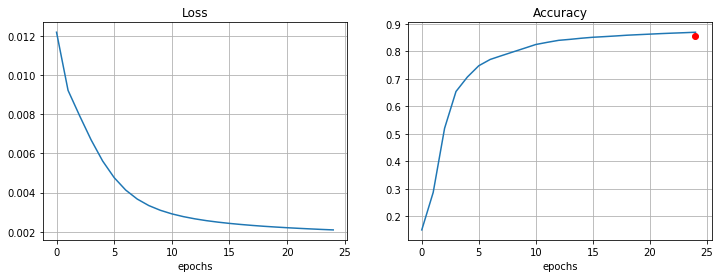

In [0]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.title('Loss')
plt.xlabel('epochs')
plt.plot(range(epochs),loss_train)
plt.grid()
plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.xlabel('epochs')
plt.plot(range(epochs),accuracy_train)
plt.scatter(epochs-1,accuracy_test,c='r')
plt.grid()
plt.show()

In [0]:
# MnistFashion
# на 10 эпохах не могу явно выделить какую-то модель
# а вот на 25 эпохах заметна небольшая тенденция к росту точности 
# на обоих выборках при увеличении количества слоев

# epochs = 10
# дле batch_size = 32

# Результаты NN 784 64 32 10 (отработано на Colab (TPU))
#       0:01:54
#       loss_train = 0.0031100567430257797
#       accuracy_train = 0.8044833333333333
#       accuracy_test  = 0.8036

# Результаты NN 784 32 10 (отработано на Colab (TPU))
#       0:01:43
#       loss_train = 0.003028209786862135
#       accuracy_train = 0.8209166666666666
#       accuracy_test  = 0.813

# Результаты NN 784 10 (отработано на Colab (TPU))
#       0:01:32
#       loss_train = 0.003098829183727503
#       accuracy_train = 0.8286166666666667
#       accuracy_test  = 0.8189

# epochs = 25
# дле batch_size = 32

# Результаты NN 784 64 32 10 (отработано на Colab (TPU))
#       0:04:57
#       loss_train = 0.002093949355185032
#       accuracy_train = 0.8700833333333333
#       accuracy_test  = 0.8558

# Результаты NN 784 32 10 (отработано на Colab (TPU))
#       0:04:19
#       loss_train = 0.0022601080127060413
#       accuracy_train = 0.8598333333333333
#       accuracy_test  = 0.8454

# Результаты NN 784 10 (отработано на Colab (TPU))
#       0:03:50
#       loss_train = 0.003098829183727503
#       accuracy_train = 0.8481
#       accuracy_test  = 0.8335
